**<u><font size="+2">TASK 02(Intermediate Level) - Prediction Using Decision Tree Algorithm</font></u>**

**<font size="+0">CREATE THE DECISION TREE CLASSIFIER AND VISUALIZE IT GRAPHICALLY. THE PURPOSE IS IF WE FEED ANY NEW DATA TO THIS CLASSIFIER, IT WOULD BE ABLE TO PREDICT THE RIGHT CLASS ACCORDINGLY.</font>**


**<font size="+0">AUTHOR: ARVIN ELEGIDO</font>**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

**<u><font size="+1">EXPLORATORY DATA ANALYSIS</font></u>**

In [2]:
# define the column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the iris dataset
iris = pd.read_csv('iris.data', names=columns)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check the dimensions of the dataset
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
# Check for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Check the data types of each column
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

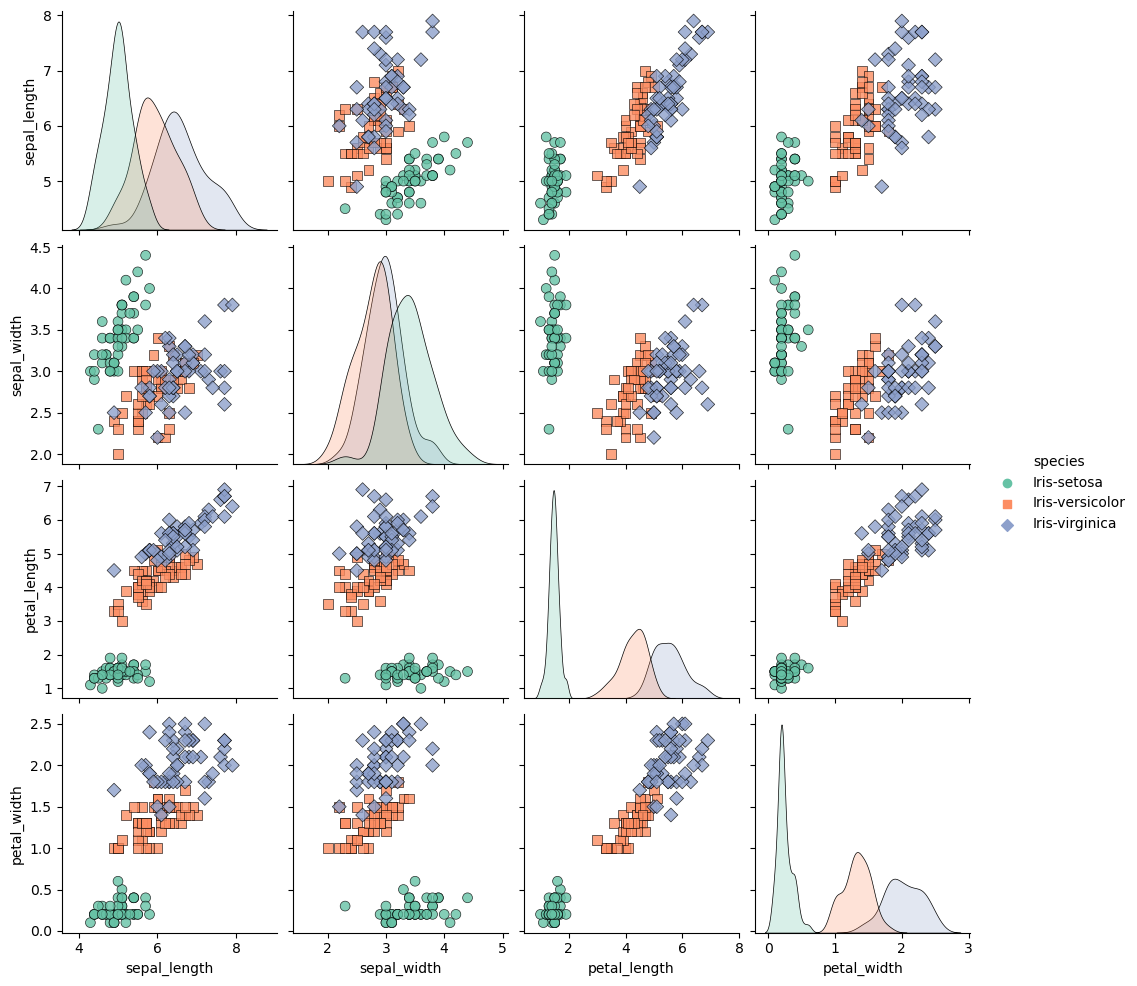

In [9]:
#Pair plot - Visualize pairwise relationships between features and color the data points according to their species.
# Customize the pair plot for better visualization
sns.pairplot(
    iris,
    hue='species',
    palette='Set2',
    markers=['o', 's', 'D'],
    plot_kws={'s': 50, 'edgecolor': 'k', 'linewidth': 0.5, 'alpha': 0.8},
    diag_kws={'edgecolor': 'k', 'linewidth': 0.5}
)

# Show the plot
plt.show()

After analyzing the pairplot of the Iris dataset, it is evident that the relationship between sepal length and sepal width is moderately linear, while the relationship between petal length and petal width is more strongly linear. This observation implies that petal length and petal width may serve as more informative features for predicting the species of Iris.

Moreover, the analysis reveals that the setosa species is distinctly separated from the other two species in terms of petal length and petal width, while the versicolor and virginica species exhibit considerable overlap in these two features. Thus, to accurately distinguish between the versicolor and virginica species, more complex models or additional features may be necessary.

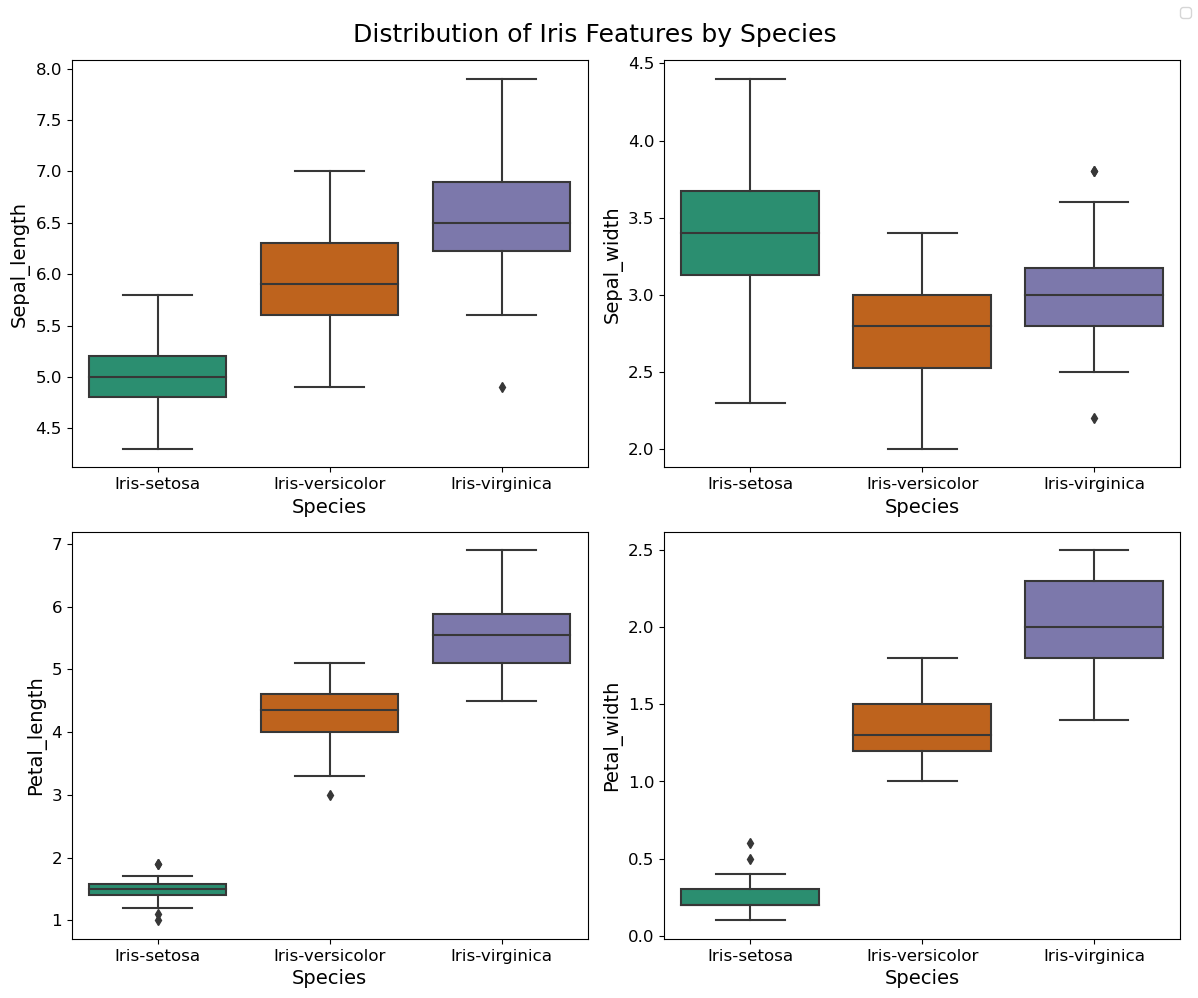

In [10]:
# Box plots - Visualize the distribution of each feature and compare them across different classes.
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Set the feature columns
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop over each feature and create a box plot in the appropriate subplot
for i, feature in enumerate(feature_columns):
    sns.boxplot(x='species', y=feature, data=iris, palette='Dark2', ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_xlabel('Species', fontsize=14)
    axs[i // 2, i % 2].set_ylabel(feature.capitalize(), fontsize=14)
    axs[i // 2, i % 2].tick_params(axis='both', which='major', labelsize=12)
    axs[i // 2, i % 2].grid(False)

# Add a title to the figure
fig.suptitle('Distribution of Iris Features by Species', fontsize=18)

# Add a legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Add some space between subplots
plt.tight_layout()

# Show the plot
plt.show()

After analyzing the box plots of the Iris dataset, it is evident that the setosa species has smaller sepal lengths and widths than the versicolor and virginica species. On the other hand, the versicolor and virginica species exhibit comparable median values for sepal length and width, but the virginica species tends to have longer and wider petals than the versicolor species.

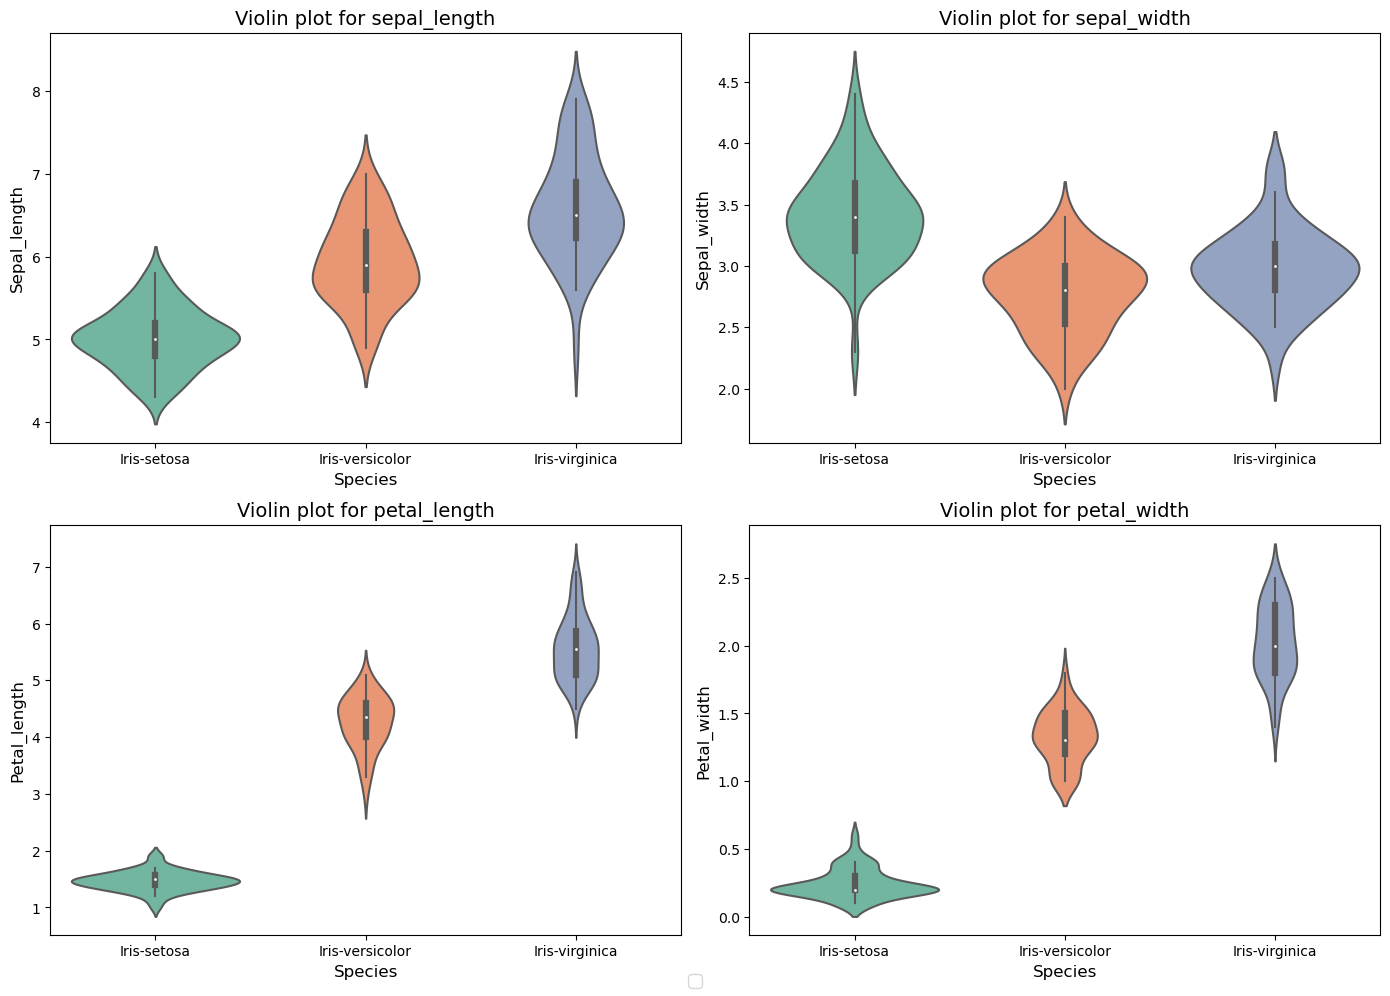

In [11]:
#Violin plots - Visualize the distribution of features, showing the probability density at different values.
palette = 'Set2'

plt.figure(figsize=(14, 10)) # Increase plot size

for i, feature in enumerate(feature_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.violinplot(x='species', y=feature, data=iris, palette=palette)
    ax.set_title(f"Violin plot for {feature}", fontsize=14) # Increase title font size
    ax.set_xlabel("Species", fontsize=12) # Increase x-axis label font size
    ax.set_ylabel(feature.capitalize(), fontsize=12) # Increase y-axis label font size

plt.tight_layout()

# Add legend
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=3, fontsize=12)

plt.show()

Upon analyzing the violin plots of the Iris dataset, we can observe that the setosa species has smaller sepal lengths, petal widths, and petal lengths in comparison to the versicolor and virginica species. Additionally, the versicolor and virginica species exhibit almost identical median values for sepal length and width. However, the virginica species tends to have longer and wider petals than the versicolor species.

Moreover, the violin plots provide additional information that surpasses that of the box plots, as they depict the kernel density estimate of the distribution, along with quartile values. This feature allows us to examine the shape of the distribution more clearly and detect any potential bimodality or skewness in the dataset.

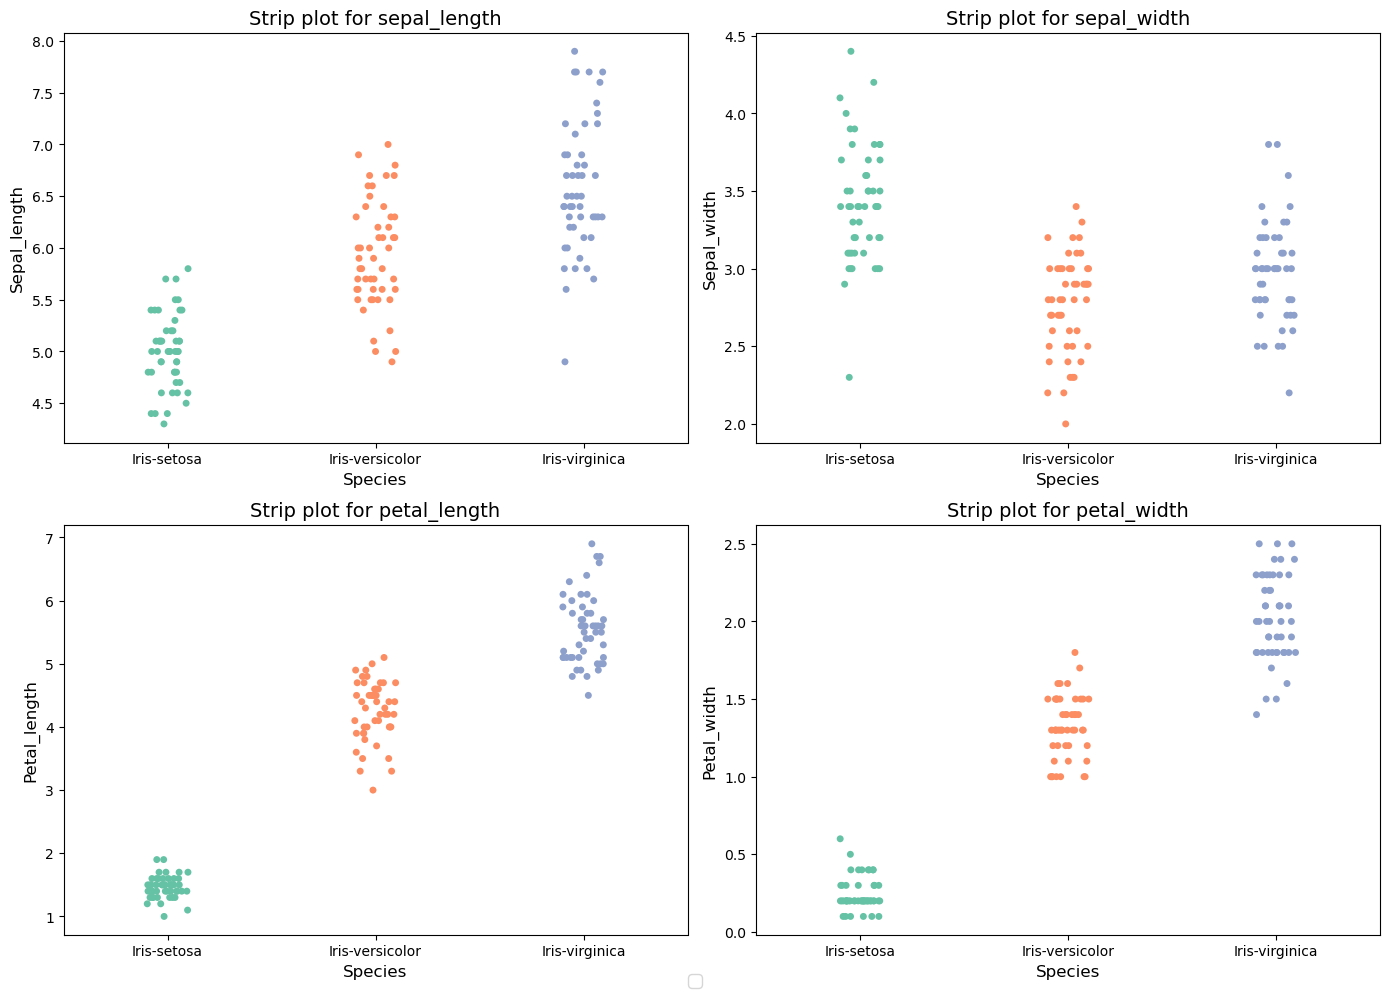

In [14]:
#Strip plots - Visualize the distribution of features by showing individual data points along an axis.
palette = 'Set2'

plt.figure(figsize=(14, 10)) # Increase plot size

for i, feature in enumerate(feature_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.stripplot(x='species', y=feature, data=iris, palette=palette, size=5) # Use stripplot instead of swarmplot, adjust size of points
    ax.set_title(f"Strip plot for {feature}", fontsize=14) # Increase title font size
    ax.set_xlabel("Species", fontsize=12) # Increase x-axis label font size
    ax.set_ylabel(feature.capitalize(), fontsize=12) # Increase y-axis label font size

plt.tight_layout()

# Add legend
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=3, fontsize=12)

plt.show()


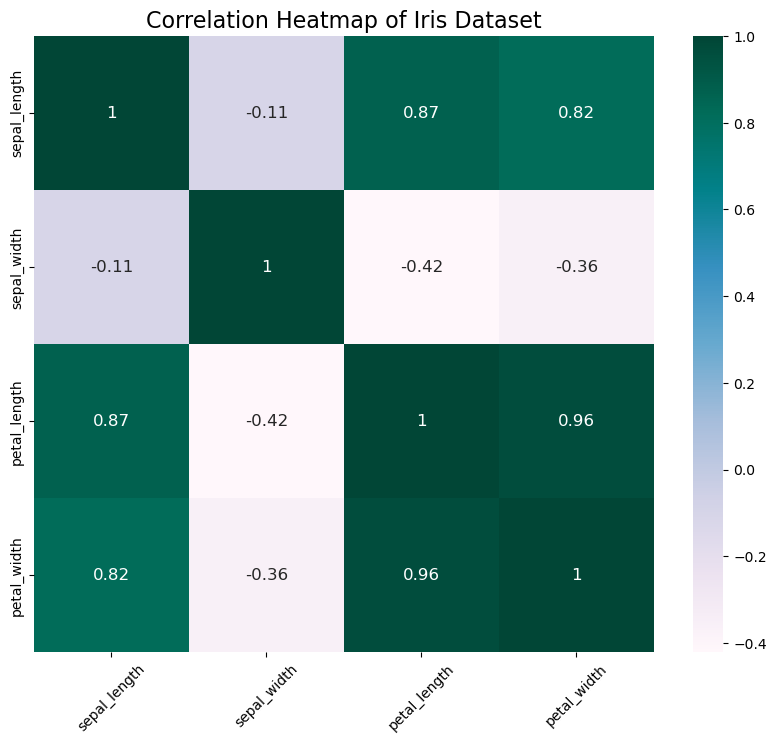

In [15]:
corr = iris.corr()

plt.figure(figsize=(10, 8)) # Increase plot size

sns.heatmap(corr, annot=True, cmap='PuBuGn', annot_kws={"size": 12}) # Increase font size of annotations
plt.xticks(rotation=45) # Rotate x-axis labels
plt.title("Correlation Heatmap of Iris Dataset", fontsize=16) # Add plot title

plt.show()

Based on the provided correlation heatmap values, we can make the following observations:

There is a strong positive correlation between petal_length and petal_width (0.96). This indicates that as petal_length increases, petal_width also tends to increase, and vice versa.

There is a strong positive correlation between sepal_length and petal_length (0.87), as well as between sepal_length and petal_width (0.82). This means that larger sepal_length values are generally associated with larger petal_length and petal_width values.

There is a moderate negative correlation between sepal_width and petal_length (-0.42), as well as between sepal_width and petal_width (-0.36). This suggests that as sepal_width increases, petal_length and petal_width tend to decrease, and vice versa. However, this relationship is not as strong as the positive correlations mentioned earlier.

There is a weak negative correlation between sepal_length and sepal_width (-0.11). This implies that there is a slight tendency for larger sepal_length values to be associated with smaller sepal_width values, and vice versa. However, this relationship is weak and may not hold much significance in the analysis.

Overall, the heatmap confirms that there are strong relationships between the different features in the Iris dataset, which is consistent with what we would expect based on the biology of the iris plant. 

**<u><font size="+1">Predicting Iris Flower Species with PyCaret</font></u>**

In [16]:
from pycaret.classification import *
# Initializing the setup
clf = setup(data = iris, target = 'species', session_id = 123)

# Comparing all models
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.6420
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.3060
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0210
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0260
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.1510
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.0190
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.1140
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.1410
xgboost,Extreme Gradient Boosting,0.9355,0.9868,0.9355,0.9440,0.9343,0.9023,0.9077,0.0720
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In the case of predicting Iris flower species, PyCaret may generate summaries of the performance of different models, such as Logistic Regression, Random Forest, and Decision Tree, among others. Each model may have different metrics such as accuracy, precision, recall, and F1 score.

Based on the problem, if we are interested in maximizing the interpretability of the model, we may choose the Decision Tree model. Decision Trees are simple models that are easy to understand and interpret, making them useful for gaining insights into the decision-making process of the model. Additionally, Decision Trees can handle both categorical and numerical data, making them a versatile choice for a wide range of problems.

Therefore, even though other models may have good performance metrics, based on the problem of predicting Iris flower species, we will choose the Decision Tree model due to its interpretability and versatility.

**<u><font size="+1">FINE TUNING DECISION TREE CLASSIFIER</font></u>**

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.8571,0.8182,0.8788,0.8061,0.7250,0.7642
1,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
2,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
3,0.7273,0.7857,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9481,0.9091,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.7273,0.8442,0.7273,0.8442,0.6826,0.5875,0.6674
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.9286,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


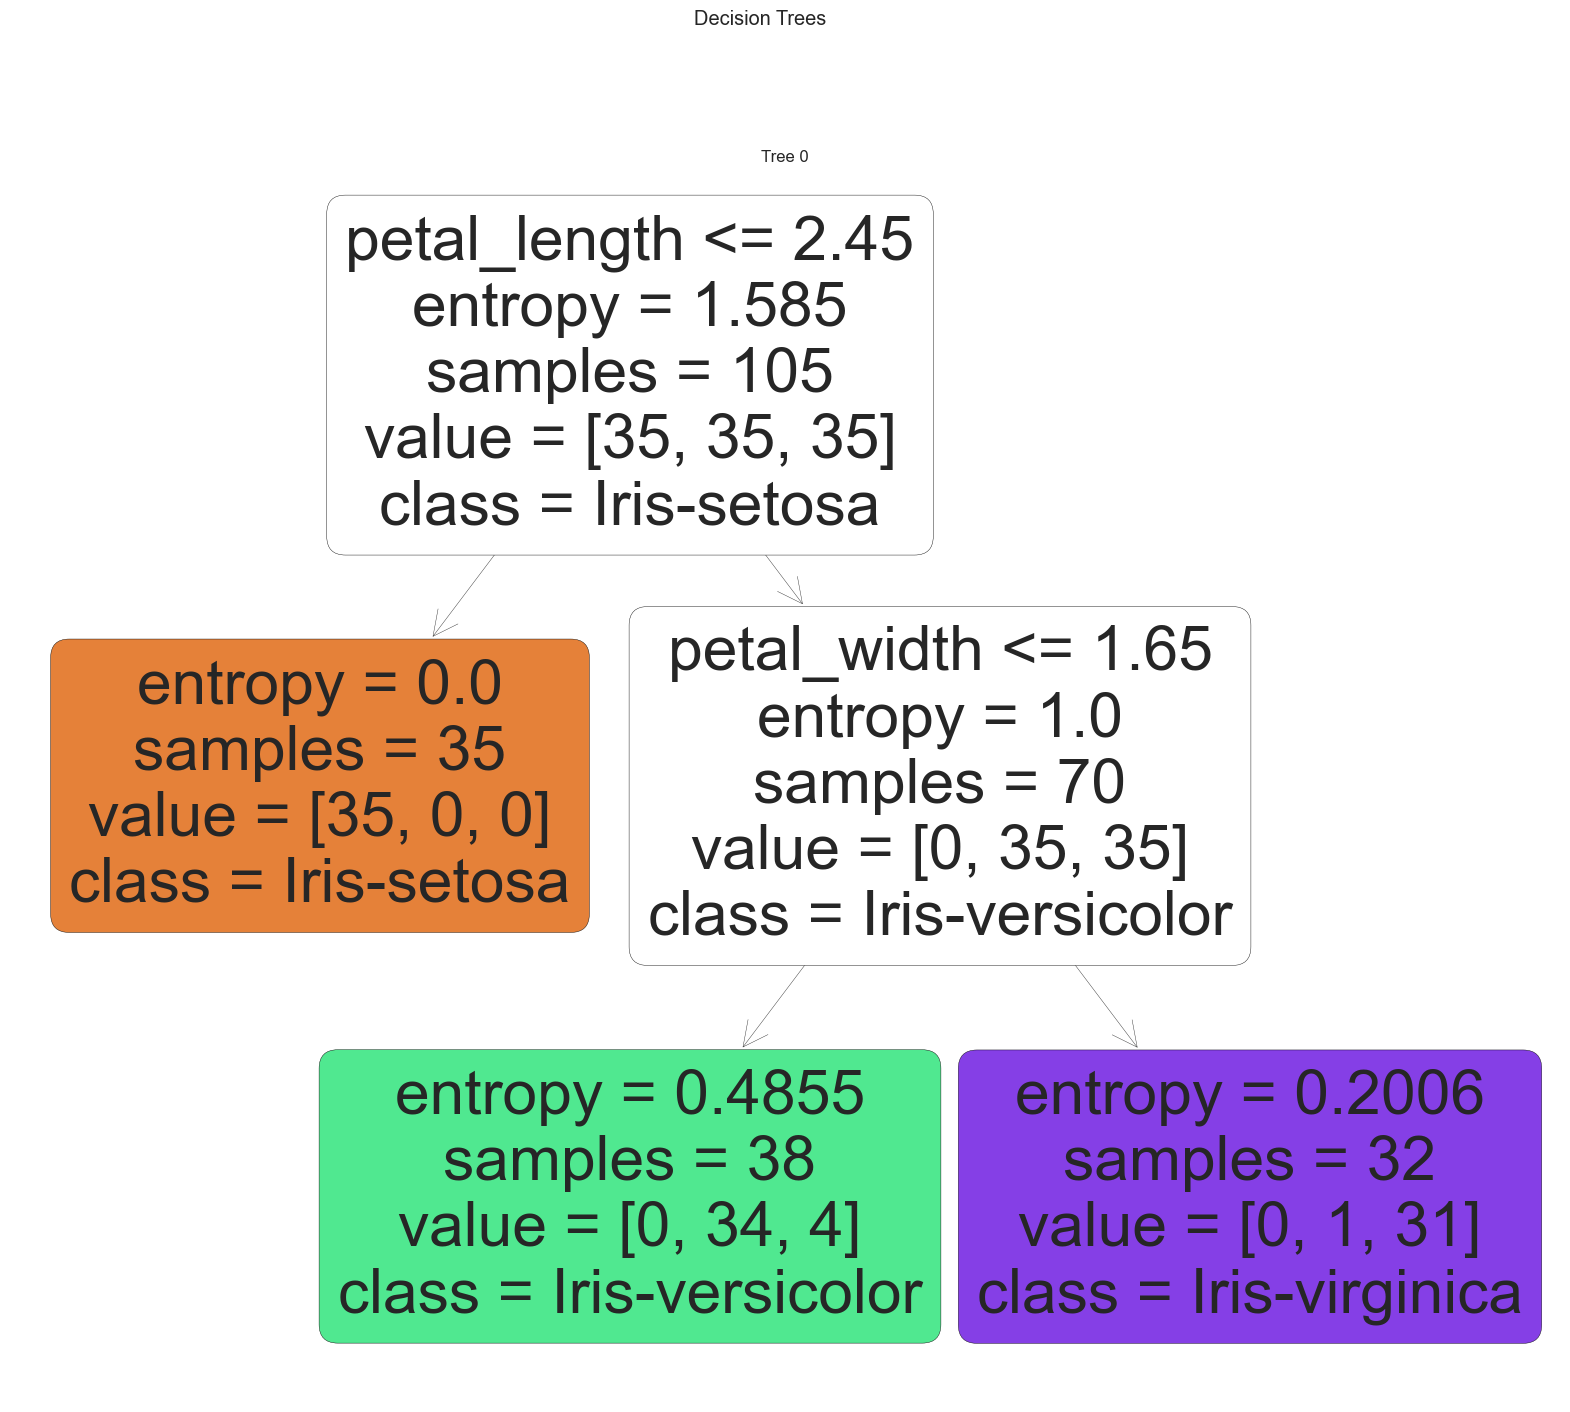

In [17]:
# Creating a model
dt = create_model('dt')

# Tuning a model
tuned_dt = tune_model(dt)

# Plotting a model
plot_model(tuned_dt, plot='tree')

This output shows the performance metrics of the Decision Tree model after it has been fine-tuned using PyCaret. The fine-tuning process involves selecting the best hyperparameters for the model that result in the highest performance on the validation set.

The performance metrics are shown for each fold of the cross-validation process. Cross-validation is a technique used to evaluate the performance of a model by splitting the dataset into multiple folds and training the model on each fold while using the others for validation.

The performance metrics shown for each fold include:

Accuracy: the proportion of correctly classified samples
AUC: the area under the receiver operating characteristic (ROC) curve
Recall: the proportion of true positive samples out of all positive samples
Precision: the proportion of true positive samples out of all samples classified as positive
F1: the harmonic mean of precision and recall
Kappa: Cohen's kappa coefficient, which measures the agreement between the model's predictions and the true labels
MCC: Matthews correlation coefficient, which measures the correlation between the model's predictions and the true labels
The "Mean" and "Std" rows show the mean and standard deviation of the performance metrics across all folds, which give an overall indication of the model's performance.

After the fine-tuning process, the output also shows that 10 different hyperparameter combinations were tested using a grid search (10 candidates), and a total of 100 fits were performed (10 fits per candidate). The final decision tree model with the best hyperparameters was selected based on its performance on the validation set.

**<u><font size="+1">Predicting Species of New Data using a Decision Tree Classifier</font></u>**

In [18]:
# define the column names
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# generate random values for each column
sepal_length = np.random.uniform(low=4.0, high=8.0, size=30)
sepal_width = np.random.uniform(low=2.0, high=4.5, size=30)
petal_length = np.random.uniform(low=1.0, high=6.0, size=30)
petal_width = np.random.uniform(low=0.1, high=2.5, size=30)

# combine the values into a Pandas dataframe
data = np.column_stack((sepal_length, sepal_width, petal_length, petal_width))
new_data = pd.DataFrame(data, columns=columns)


# Predicting on new data
predictions = predict_model(tuned_dt, data=new_data)

# Printing the predictions
print(predictions)

    sepal_length  sepal_width  petal_length  petal_width prediction_label  \
0       6.785877     2.230262      4.346569     1.791901   Iris-virginica   
1       5.144557     3.084253      3.929683     2.488860   Iris-virginica   
2       4.907406     3.077157      4.124517     0.954196  Iris-versicolor   
3       6.205259     3.234213      4.373445     1.930115   Iris-virginica   
4       6.877876     3.064576      5.211712     1.523625  Iris-versicolor   
5       5.692426     2.780653      1.415975     1.760084      Iris-setosa   
6       7.923057     3.065878      4.818414     0.462706  Iris-versicolor   
7       6.739319     4.233473      2.218332     1.057303      Iris-setosa   
8       5.923728     4.360400      1.971115     0.678054      Iris-setosa   
9       5.568470     3.254592      3.862285     0.924294  Iris-versicolor   
10      5.372712     3.559882      1.478563     1.331508      Iris-setosa   
11      6.916199     2.289046      5.426634     1.699899   Iris-virginica   

**<u><font size="+1">VISUALIZING NEW DATA</font></u>**

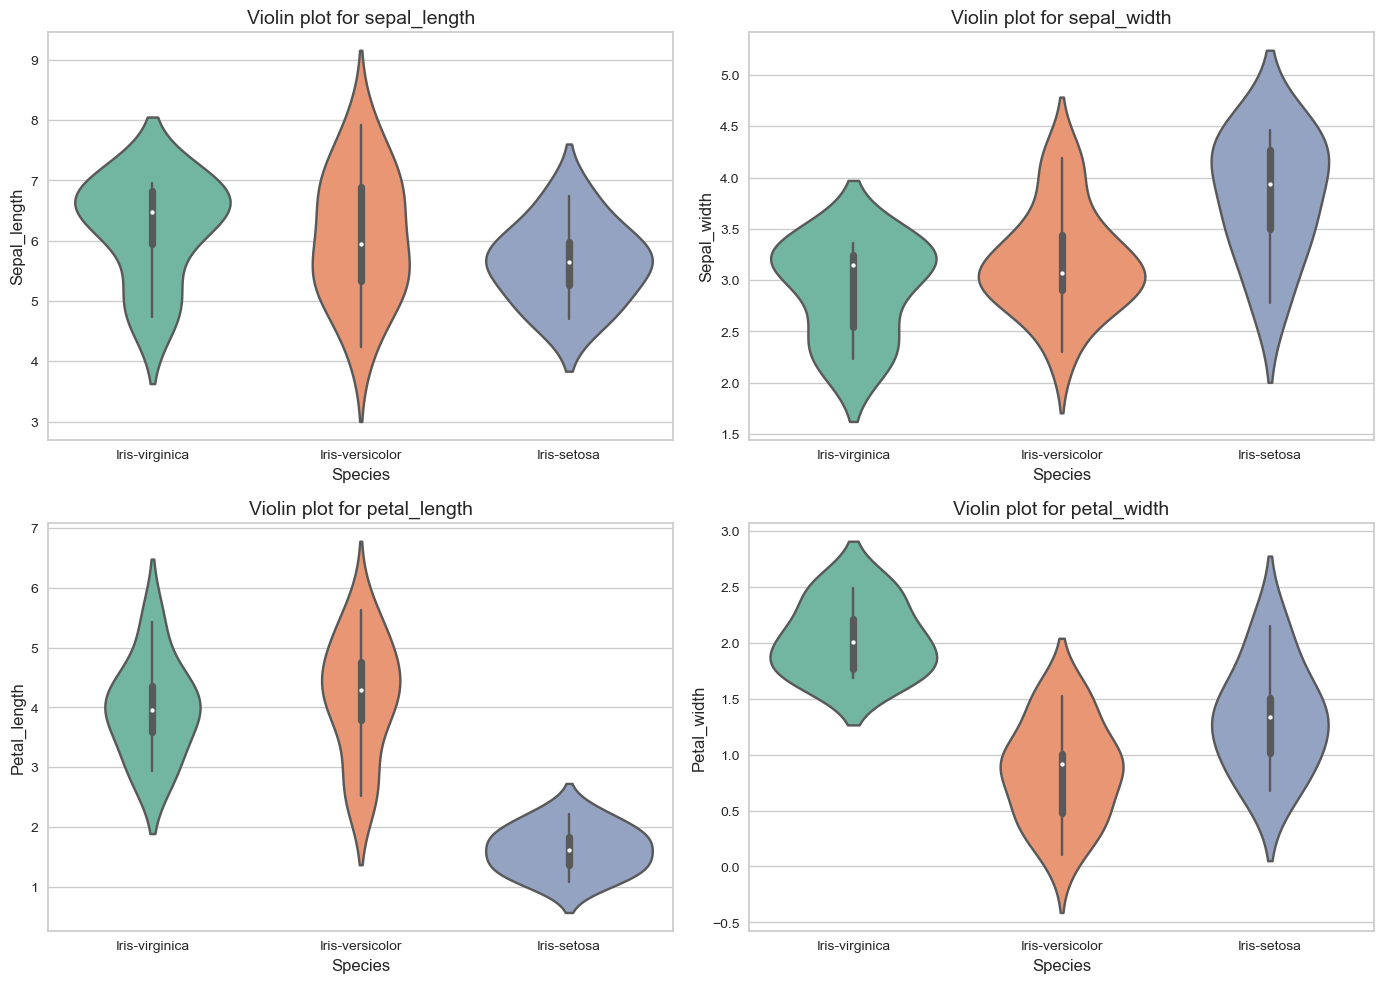

In [20]:
#Violin plots - Visualize the distribution of features, showing the probability density at different values.
palette = 'Set2'

plt.figure(figsize=(14, 10)) # Increase plot size

for i, feature in enumerate(feature_columns):
    ax = plt.subplot(2, 2, i + 1)
    sns.violinplot(x='prediction_label', y=feature, data=predictions, palette=palette)
    ax.set_title(f"Violin plot for {feature}", fontsize=14) # Increase title font size
    ax.set_xlabel("Species", fontsize=12) # Increase x-axis label font size
    ax.set_ylabel(feature.capitalize(), fontsize=12) # Increase y-axis label font size

plt.tight_layout()

# Add legend
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', ncol=3, fontsize=12)

plt.show()

**<u><font size="+1">Summary:</font></u>**


The Iris dataset is a widely used and recognized multiclass classification dataset in the field of data science and machine learning. It consists of 150 samples from three species of the Iris flower (Iris setosa, Iris virginica, and Iris versicolor), with 50 samples per species. Each sample contains four features: sepal length, sepal width, petal length, and petal width, all measured in centimeters. The objective is to create a model that can accurately classify a given sample into one of the three species based on these four features.

After using the PyCaret library, which simplifies the model selection and evaluation process, several models were trained and compared based on their performance metrics. The Decision Tree Classifier was identified as one of the best models, but not the top performer.

**<u><font size="+1">Conclusion:</font></u>**


Although the Decision Tree Classifier was not the top-performing model for the Iris dataset classification task, it was selected based on the specific requirements of the task. Decision trees are known for their simplicity and ease of understanding, making them an excellent choice when interpretability is a priority. This model provides a good balance between accuracy and interpretability, allowing users to understand the underlying patterns in the data and the basis for the classifications made by the model.

It is recommended to perform further hyperparameter tuning and cross-validation to ensure that the model's performance is robust and consistent across different data splits. Additionally, it is important to monitor the model's performance on new data to validate its ability to generalize to unseen samples effectively. By taking these measures, the Decision Tree Classifier, despite not being the top performer, is expected to provide accurate and interpretable classifications for the Iris dataset in accordance with the task requirements.